In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# 查看資料集

In [87]:
df = pd.read_csv('./dataset/water_potability.csv')
display(df.head())
display(df.info())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


None

# 移除空值欄位
剩餘2011筆

In [88]:
df = df.dropna(axis=0, how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


# 視覺化資料進行簡易分析

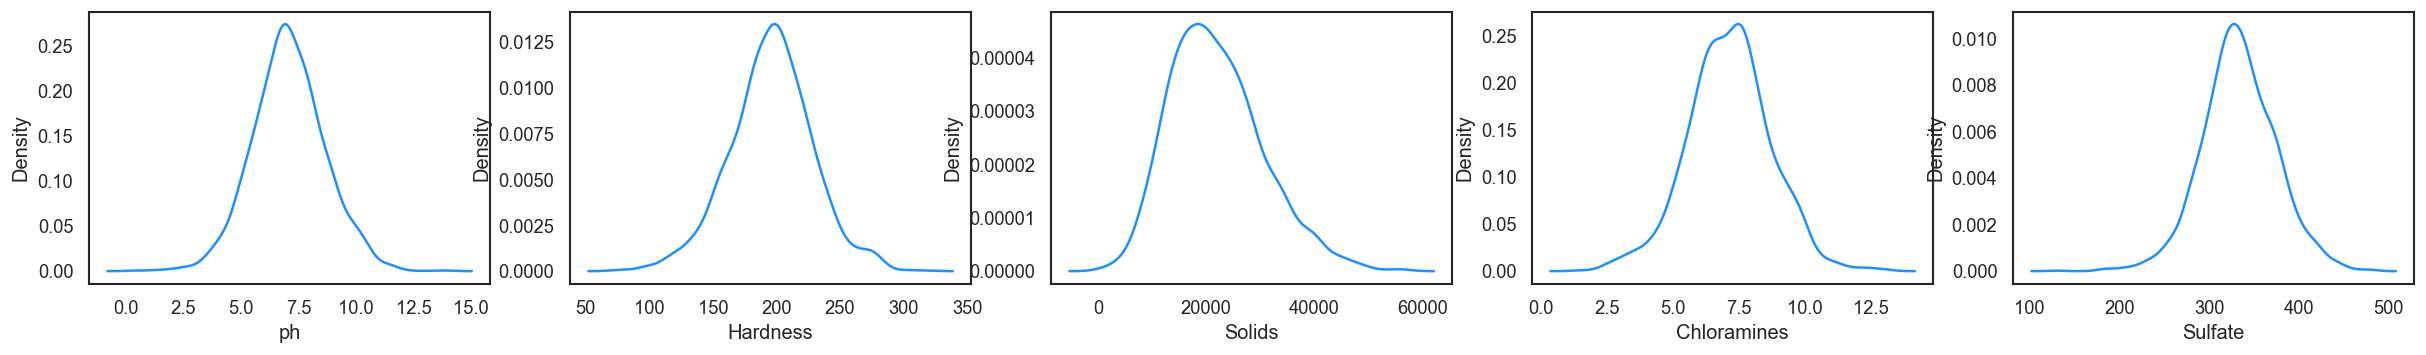

In [89]:
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,5, figsize=(25,3), sharey=False, dpi=120)
sns.set_theme(style="darkgrid")

sns.kdeplot(data=df['ph'],ax=axes[0],color="dodgerblue")
sns.kdeplot(data=df['Hardness'],ax=axes[1],color="dodgerblue")
sns.kdeplot(data=df['Solids'],ax=axes[2],color="dodgerblue")
sns.kdeplot(data=df['Chloramines'],ax=axes[3],color="dodgerblue")
sns.kdeplot(data=df['Sulfate'],ax=axes[4],color="dodgerblue")

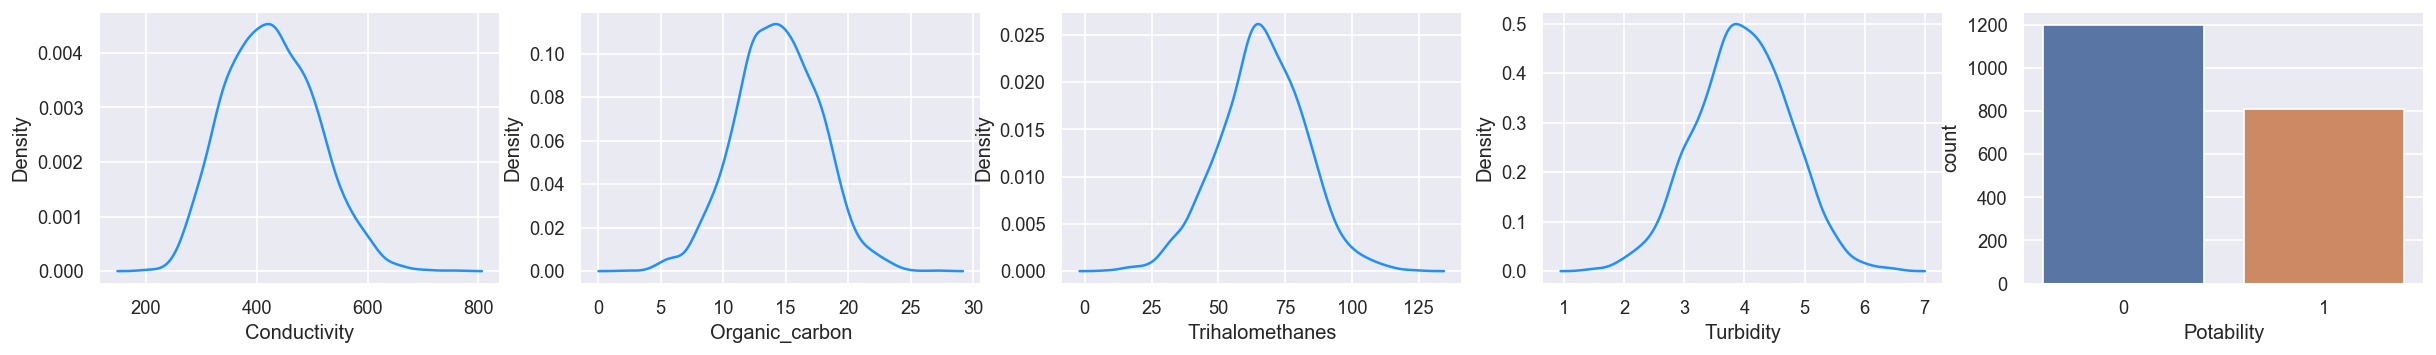

In [90]:
fig, axes = plt.subplots(1,5, figsize=(25,3), sharey=False, dpi=120)
sns.set_theme(style="darkgrid")

sns.kdeplot(data=df['Conductivity'],ax=axes[0],color="dodgerblue")
sns.kdeplot(data=df['Organic_carbon'],ax=axes[1],color="dodgerblue")
sns.kdeplot(data=df['Trihalomethanes'],ax=axes[2],color="dodgerblue")
sns.kdeplot(data=df['Turbidity'],ax=axes[3],color="dodgerblue")
sns.countplot(data=df, x = 'Potability',order=[0,1],ax=axes[4])


# 標準化

In [91]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer

min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()
max_abs_scaler = MaxAbsScaler()
robust_scaler = RobustScaler()
qt_scaler = QuantileTransformer()
power_scaler = PowerTransformer(method='yeo-johnson')
uvs_scaler = Normalizer(norm = 'l2')
mean_scaler = Normalizer()

In [92]:
df['ph'] = std_scaler.fit_transform(df['ph'].values.reshape(-1,1))
df['Hardness'] = std_scaler.fit_transform(df['Hardness'].values.reshape(-1,1))
df['Solids'] = std_scaler.fit_transform(df['Solids'].values.reshape(-1,1))
df['Chloramines'] = std_scaler.fit_transform(df['Chloramines'].values.reshape(-1,1))
df['Sulfate'] = std_scaler.fit_transform(df['Sulfate'].values.reshape(-1,1))
df['Conductivity'] = std_scaler.fit_transform(df['Conductivity'].values.reshape(-1,1))
df['Organic_carbon'] = std_scaler.fit_transform(df['Organic_carbon'].values.reshape(-1,1))
df['Trihalomethanes'] = std_scaler.fit_transform(df['Trihalomethanes'].values.reshape(-1,1))
df['Turbidity'] = std_scaler.fit_transform(df['Turbidity'].values.reshape(-1,1))


In [93]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,0.782466,0.564114,0.011687,0.583804,0.574378,-0.783962,1.227032,2.111652,0.844761,0
4,1.275463,-0.455653,-0.455835,-0.370947,-0.560480,-0.348429,-0.842154,-2.140399,0.135033,0
5,-0.954835,-0.234614,0.790645,0.259104,-0.158911,-1.810063,-1.792340,-0.714423,-1.807366,0
6,1.994902,1.596951,0.790764,0.239248,1.467140,-1.770608,-0.170876,1.132494,-1.662163,0
7,0.985323,0.226606,-0.954313,-1.622878,-0.726179,0.595858,-0.599824,-0.224135,0.553348,0


# 特徵重要性

In [137]:
# check feature importance
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 讀入資料
x = df.drop(['Potability'],axis = 1)
y = df['Potability']

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.3)

feature_names = [f'{i}' for i in x.columns]
forest = RandomForestClassifier(random_state=0)
forest.fit(train_X, train_y)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time
indices = np.argsort(importances)

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=feature_names)
top_10_feature = forest_importances.sort_values(ascending=False)[:10]
display(top_10_feature)


Elapsed time to compute the importances: 0.009 seconds


Sulfate            0.141210
ph                 0.135342
Hardness           0.120755
Solids             0.113692
Chloramines        0.110510
Trihalomethanes    0.098643
Conductivity       0.096661
Organic_carbon     0.091819
Turbidity          0.091367
dtype: float64

# 決策樹

0.9586092715231788
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       383
           1       0.97      0.91      0.94       221

    accuracy                           0.96       604
   macro avg       0.96      0.95      0.95       604
weighted avg       0.96      0.96      0.96       604

[[377   6]
 [ 19 202]]


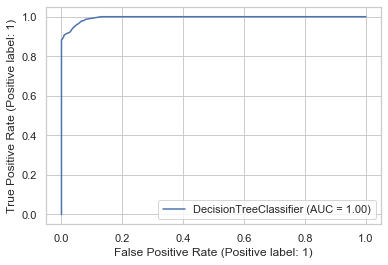

In [143]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree

# 建立分類器
clf = tree.DecisionTreeClassifier(max_depth = 20)
dt_clf = clf.fit(x, y)

# 預測
test_y_predicted = dt_clf.predict(test_X)

# 績效
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
report = classification_report(test_y,test_y_predicted)
dt_cfm = confusion_matrix(test_y,test_y_predicted)

print(accuracy)
print(report)
print(dt_cfm)
metrics.plot_roc_curve(dt_clf, test_X, test_y)  
plt.show()     


# KNN

In [139]:
from sklearn import neighbors

In [141]:
# 建立分類器
clf = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn_clf = clf.fit(x, y)

# 預測
test_y_predicted = knn_clf.predict(test_X)

# 績效
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
report = classification_report(test_y,test_y_predicted)
knn_cfm = confusion_matrix(test_y,test_y_predicted)

print(accuracy)
print(report)
print(knn_cfm)

0.804635761589404
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       383
           1       0.77      0.67      0.71       221

    accuracy                           0.80       604
   macro avg       0.79      0.78      0.78       604
weighted avg       0.80      0.80      0.80       604

[[338  45]
 [ 73 148]]
